# Homework

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

<Axes: xlabel='final_price', ylabel='Count'>

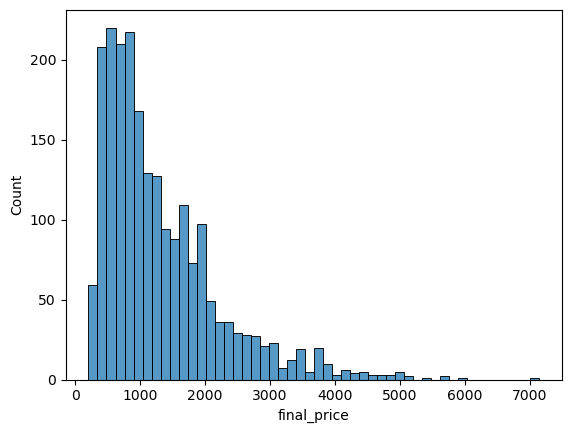

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df.final_price, bins = 50)

final_price variable has a long tail distribution

In [8]:
#Find column with missing values

numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
print(numerical_columns)

x = list(df.columns[df.isnull().sum() > 0])
print(x)

print('Screen is column with missing values')



['ram', 'storage', 'screen', 'final_price']
['storage_type', 'gpu', 'screen']
Screen is column with missing values


In [9]:
ram_median = df.ram.median()

print('%.2f is the median for ram' %ram_median)

16.00 is the median for ram


In [10]:
df_clean = df.copy()

In [11]:
## Prepare and split the dataset

n = int(len(df))

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[ :n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]


#create Feature Matrices, and y vectors

y_test = np.log1p(df_test['final_price'].values)
y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)

In [13]:
#create Feature Matrices, and y vectors

y_test = df_test['final_price'].values
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values

In [14]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"']
2160

status
['New' 'Refurbished']
2

brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo']
27

model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair']
121

cpu
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['SSD' 'eMMC' nan]
2

gpu
[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['No' 'Yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [16]:
base = ['ram', 'storage', 'screen']

In [17]:
def prepare_X_mean(df):
    df = df.copy()
    df = df[base]
    
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

    return df



def prepare_X_0(df):
    df = df.copy()
    df = df[base]
    
    for col in df.columns:
        df[col] = df[col].fillna(0)

    return df

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # w = (X^tX)^-1 X^t y

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def rmse(y, y_pred):
    error  = y - y_pred
    se = error ** 2
    mse = se.mean()

    return np.sqrt(mse)
    

In [19]:
X_train_mean = prepare_X_mean(df_train)
X_train_0 = prepare_X_0(df_train)

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
w0_0, w_0 = train_linear_regression(X_train_0, y_train)


X_val_mean = prepare_X_mean(df_val)
X_val_0 = prepare_X_0(df_val)


y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

rmse_mean = rmse(y_val, y_pred_mean)
rmse_0 = rmse(y_val, y_pred_0)

print("%.2f is RMSE for Mean" % rmse_mean)
print("%.2f is RMSE for 0" % rmse_0)

600.26 is RMSE for Mean
597.36 is RMSE for 0


Missing Value 0 performs better

In [21]:
## question 4

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:

for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred = w_0 + X_val_0.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.2f' % (r, rmse_val))

     0 597.36
  0.01 597.36
     1 597.21
    10 597.06
   100 597.90


In [58]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X_0(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_0(df_val)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)

0 565.4520868771004
1 636.798542305673
2 588.9558697907955
3 597.8148920012511
4 571.9627915111033
5 573.2383256618967
6 647.3438328407198
7 550.4398184485973
8 587.3335036169941
9 576.1017929433127


In [62]:
np.std(rmses)

29.176491258292177